In [11]:
# Requires tidyverse, openxlsx, and scale packages already installed install.packages("openxlsx")
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(openxlsx))

In [12]:
# Load data and select the cells of interest
data <- read.xlsx("https://escholarship.umassmed.edu/context/pediatrics_data/article/1004/type/native/viewcontent")
data <- data[,c(1:73, 76:92)]

In [13]:
# Create IDAAIc Data for Remitters
IDAAIcDataRemissionStatus0 <- data%>%
  filter(`NonRemission.Code` == 0) %>%
  select(63, 64, 66:70)%>%
  gather(key = "time", "IDAA1c") %>%
  mutate(try = IDAA1c) %>%
  na.omit()

In [14]:
# Create IDAA1c Data for Non-Remitters
IDAAIcDataRemissionStatus1 <- data%>% #nonremitters
  filter(`NonRemission.Code`== 1) %>%
  select(63, 64, 66:70) %>%
  gather(key = "time", "IDAA1c") %>%
  na.omit()

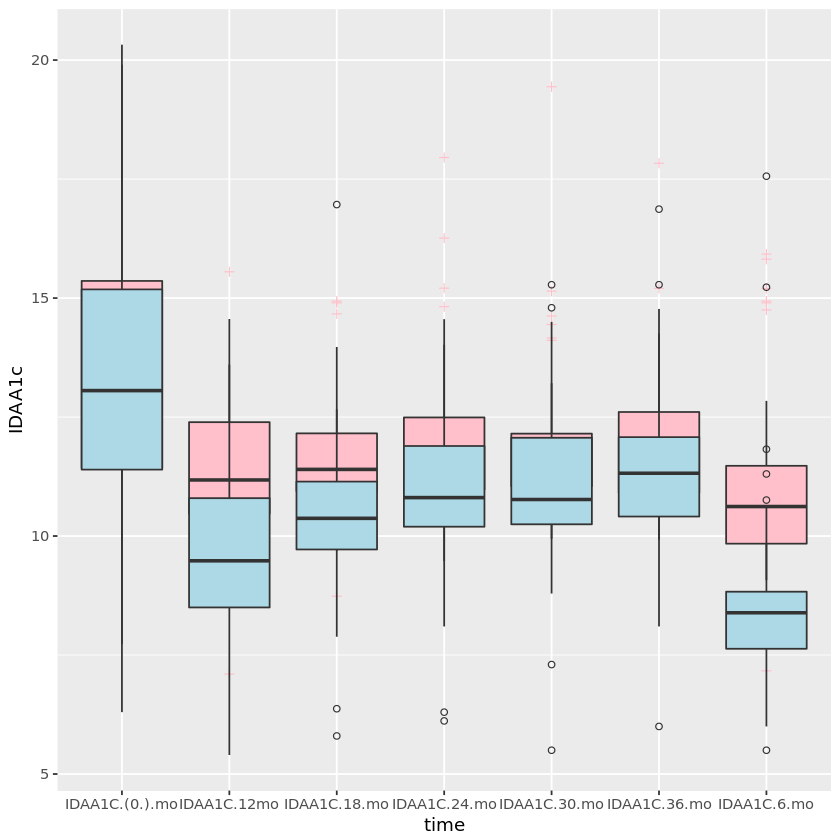

In [5]:
# Create Boxplot Comparing IDAA1c of Remitters vs. Non- Remitters
ggplot(IDAAIcDataRemissionStatus1)+
  geom_boxplot(aes(x= time, y=IDAA1c), fill = "pink", outlier.shape = 3, outlier.color = "pink")+
  geom_boxplot(data = IDAAIcDataRemissionStatus0, aes(time, try), fill = "lightblue", outlier.shape = 1)

In [15]:
# Selcet data for A1c Data, rename columns to time of A1c measurement
A1cData <- select(data, 49:62)
colnames(A1cData) <- c("0", "3", "6", "A1c7.5% Code", "9", "12", "15", "18", "21", "24", "27", "30", "33", "36")


In [16]:
# Summarise Non-remitters Data

nonremit <- A1cData %>% 
  filter(`A1c7.5% Code` == 0) %>%
  select(-4)%>%
  gather(time, A1c) %>%
  group_by(time) %>%
  na.omit() %>%
  summarise(meanA1c = mean(as.numeric(A1c)))

nonremit <- cbind(nonremit, treatment = rep(("Non-remitters"), length(nonremit$time)))

In [17]:
# Summarise Remitter Data

remit <- A1cData %>% 
  filter(`A1c7.5% Code` == 1) %>%
  select(-4)%>%
  gather(time, A1c) %>%
  group_by(time) %>%
  na.omit() %>%
  summarise(meanA1c = mean(as.numeric(A1c)))

remit <- cbind(remit, treatment = rep(("Remitters"), length(remit$time)))

In [18]:
# Change data values to numerics and create one dataframe

nonremit$time <- as.numeric(nonremit$time)
remit$time <- as.numeric(remit$time)
final <- rbind(nonremit,remit)

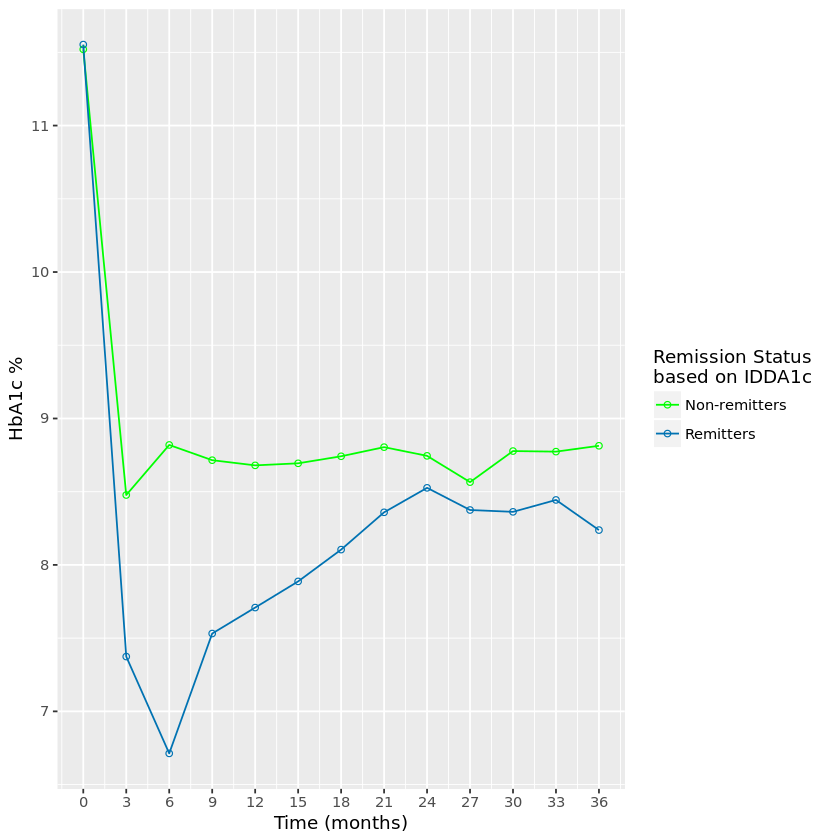

In [26]:
# Create graph comaring A1c over time for Remitters vs. Non-remitters
# install.packages("scales")
ggplot(final,aes(x=time, y=meanA1c, color = treatment, group = treatment) )+
  geom_point(shape = 1)+
  geom_line()+
  scale_x_continuous(breaks = c(0,3,6,9,12,15,18,21,24,27,30,33,36))+
  #scale_y_continuous(labels = scales::number_format(accuracy = 0.1))+
  ylab("HbA1c %")+
  xlab("Time (months)")+
  labs(color = "Remission Status \nbased on IDDA1c")+
  scale_color_manual(values=c("green", "#0072B2"))